# Data Visualization Notebook

In [26]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt

### Quick Tau Check

In [27]:
sim0_pk_arrays = h5py.File("raw/sims_v3/sim0/pk_arrays.hdf5", "r")
print("Sim0 Tau:\t", float(sim0_pk_arrays["header"]["tau"][()]))
sim0_pk_arrays.close()
sim1_pk_arrays = h5py.File("raw/sims_v3/sim1/pk_arrays.hdf5", "r")
print("Sim1 Tau:\t", float(sim1_pk_arrays["header"]["tau"][()]))
sim1_pk_arrays.close()
sim2_pk_arrays = h5py.File("raw/sims_v2/sim2/pk_arrays.hdf5", "r")
print("Sim2 Tau:\t", float(sim2_pk_arrays["header"]["tau"][()]))
sim2_pk_arrays.close()

Sim0 Tau:	 0.0658586580846387
Sim1 Tau:	 0.06306919865210814
Sim2 Tau:	 0.04979512035434024


### Open *OBS Grids* and *PK Arrays*

In [28]:
obs_grids = h5py.File("raw/sims_v3/sim0/obs_grids.hdf5", "r")
pk_arrays = h5py.File("raw/sims_v3/sim0/pk_arrays.hdf5", "r")

### Data Structure

In [29]:
print("OBS GRIDS")
print("Top-Level:\n", list(obs_grids.keys()))
print("Data:\n", list(obs_grids["data"].keys()))
print("Header:\n", list(obs_grids["header"].keys()))
print("")
print("PK ARRAYS")
print("Top-Level:\n", list(pk_arrays.keys()))
print("Data:\n", list(pk_arrays["data"].keys()))
print("Header:\n", list(pk_arrays["header"].keys()))

OBS GRIDS
Top-Level:
 ['data', 'header']
Data:
 ['gal_map', 'ksz_map', 't0vals', 't21_map', 'tau_map', 'xmval_list', 'xval_list', 'zval_list', 'zvals']
Header:
 ['BoxSize', 'N_grid', 'OmegaB', 'OmegaL', 'OmegaM', 'OmegaR', 'Tcmb0', 'YHe', 'alpha_zre', 'b0_zre', 'hubble0', 'kb_zre', 'nsinit', 'sigma8', 'tau', 'theta_max_ksz', 'wde', 'zmean_zre']

PK ARRAYS
Top-Level:
 ['data', 'header']
Data:
 ['pk_dd', 'pk_dx', 'pk_tt', 'pk_xx', 'vrms', 'xmval_list', 'xval_list', 'zval_list']
Header:
 ['BoxSize', 'N_grid', 'OmegaB', 'OmegaL', 'OmegaM', 'OmegaR', 'Tcmb0', 'YHe', 'alpha_zre', 'b0_zre', 'hubble0', 'kb_zre', 'nsinit', 'sigma8', 'tau', 'theta_max_ksz', 'wde', 'zmean_zre']


## Simulation Parameters (Input)
Each simulation changes three parameters to control the reionization history (with an optional fourth). These parameters are inputs to the simulation (ksz_2lpt.x) and are chosen using Latin Hypercube Sampling (LHS) to evenly cover the parameter space without running every possible combination.
- **`zmean`** (7.0 - 9.0) : Sets the midpoint of reionization.
- **`alpha`** (0.10 - 3.0) : Controls how long reionization lasts.
- **`kb`** (0.10 - 2.0) : Determines how uneven the ionized regions are (higher values more clustered).
- **`b0`** (? - ?) : Adjusts the overall strength or amplitude of the ionization field.

In [30]:
print("alpha_zre:\t", float(pk_arrays["header"]["alpha_zre"][()]))
print("b0_zre:\t\t", float(pk_arrays["header"]["b0_zre"][()]))
print("kb_zre:\t\t", float(pk_arrays["header"]["kb_zre"][()]))
print("zmean_zre:\t", float(pk_arrays["header"]["zmean_zre"][()]))

alpha_zre:	 0.8856477283194074
b0_zre:		 0.5931198102016607
kb_zre:		 1.2271054139106796
zmean_zre:	 8.545098757834571


## Output
- **`tau`** — The optical depth to reionization; measures how many CMB photons were scattered by free electrons.
- **`xmval_list`** — The average ionized fraction of the universe at different times; shows how reionization progressed.
- **`xval_list`** — The ionized fraction sampling points used to track changes in the ionization history.
- **`zval_list`** — The redshift values that correspond to each point in the ionization history.
- **`ksz_map`** — A 2D map of temperature fluctuations caused by the kinematic Sunyaev–Zel’dovich effect.

### Optical Depth to Reionization (tau)

In [31]:
print("tau:\t\t", float(pk_arrays["header"]["tau"][()]))

tau:		 0.0658586580846387


### Mean Ionized Fraction History (xmval_list)

In [32]:
print("xmval:\n", pk_arrays["data"]["xmval_list"][()])

xmval:
 [0.00000000e+00 1.77431034e-07 6.62852941e-05 2.63851238e-03
 2.64122349e-02 1.09650546e-01 2.63018954e-01 4.49641606e-01
 6.23249998e-01 7.58688032e-01 8.52727832e-01 9.13095594e-01
 9.49874929e-01 9.71508095e-01 9.83950793e-01 9.90999052e-01
 9.94959089e-01 9.97174237e-01 9.98413727e-01 9.99106420e-01
 9.99494129e-01 9.99835049e-01 9.99944641e-01 9.99980568e-01
 9.99993228e-01 9.99997624e-01]


### Ionization Fraction Samples (xval_list)

In [33]:
print("xval:\n", pk_arrays["data"]["xval_list"][()])

xval:
 [0.00000000e+00 5.15021384e-07 1.51155517e-04 4.97650169e-03
 4.27938765e-02 1.57259387e-01 3.42214146e-01 5.42031782e-01
 7.08870575e-01 8.26803529e-01 9.01609592e-01 9.45791490e-01
 9.70710562e-01 9.84352432e-01 9.91689672e-01 9.95592609e-01
 9.97659395e-01 9.98752636e-01 9.99332774e-01 9.99641093e-01
 9.99805596e-01 9.99941668e-01 9.99981875e-01 9.99994066e-01
 9.99998064e-01 9.99999362e-01]


### Redshift Values (zval list)

In [34]:
print("zval:\n", pk_arrays["data"]["zval_list"][()])

zval:
 [ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  16.  17.  18.  19.  20. ]


### kSZ Map

In [35]:
ksz_map0 = obs_grids["data"]["ksz_map"][()]
print("Shape: ", ksz_map0.shape)

Shape:  (1024, 1024)


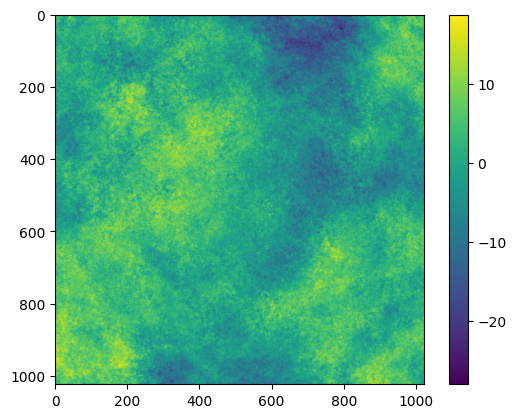

In [36]:
tcmb = 2.73
rescaled_map = ksz_map0 * tcmb * 1e6
fig, ax = plt.subplots()
im = ax.imshow(rescaled_map)
cb = plt.colorbar(im)
plt.show()

28.07540744466335
18.789120994380742 -28.07540744466335


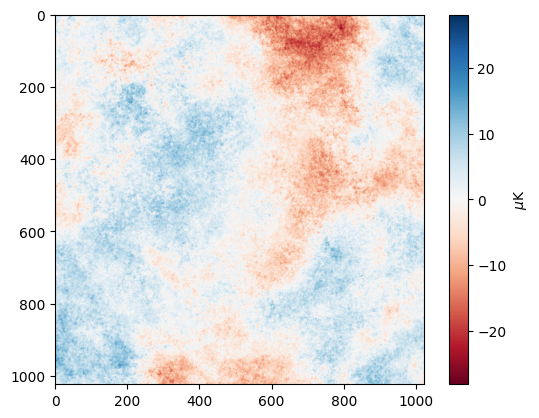

In [37]:
tmax = np.amax(rescaled_map)
tmin = np.amin(rescaled_map)
textreme = max(tmax, np.abs(tmin))
print(textreme)
print(tmax, tmin)

fig, ax = plt.subplots()
im = ax.imshow(rescaled_map, cmap="RdBu", vmin=-textreme, vmax=textreme)
cb = plt.colorbar(im, label=r"$\mu$K")
plt.show()

### Close Files

In [38]:
obs_grids.close()
pk_arrays.close()